# Idea
from sklearn.feature_selection import mutual_info_classif
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

In [44]:
from pathlib import Path

import numpy as np
import pandas as pd

In [45]:
import sys
sys.path.append(str(Path("./..").resolve()))

from py_dataset import get_all_files_df
from py_dataset import read_in_files
from py_dataset import feature_plotting

In [46]:
data_path = Path('/media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/')
assert data_path.exists()

In [47]:
df = get_all_files_df.main(data_path)
df.head(1)

txt file found, will drop /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/Heqing/device1/3_thetick_4h/collections.txt
txt file found, will drop /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/Heqing/device2/1_normal/note.txt
                                           file_path
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...
RangeIndex(start=0, stop=622, step=1)
filetype
csv    530
zip     92
Name: count, dtype: int64
                                           file_path filetype  filesize_bytes
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...      csv           49419
feature_family
SYS_data        92
KERN_data       91
FLS_data        91
RES_data        91
block_data      91
network_data    91
entropy_data    75
Name: count, dtype: int64


,file_path,filetype,filesize_bytes,researcher_name,device_name,experiment,feature_family,file_name,device
0,/media//DC/MAP_CreationOfNewDatasetsForDFL/...,csv,49419,Heqing,device1,1_normal,block_data,e4_5f_01_68_35_e6.csv,Heqing_device1


#### Get Single data
* device = Heqing_device2 => most data
* go through all features of each feature_family
    * for one 
        1. First: Sum up over all experiments/Malwares/labels first
        2. Then: Then only specific attack in comparison?
            * each column: normalize the data
            * plot boxplot: distribution

In [48]:
single_dev = df[df["device"] == "Heqing_device2"]
assert len(single_dev["device"].unique()) == 1

In [49]:
single_dev_single_data_source = single_dev[single_dev["feature_family"] == "KERN_data"]
assert len(single_dev_single_data_source["feature_family"].unique()) == 1
single_dev_single_data_source.shape

(19, 9)

In [50]:
vectors = read_in_files.get_all_columns_from_single_data_source_for_csv_files(single_dev_single_data_source)

In [51]:
print("len:", len(vectors))
vectors.columns

len: 10344


Index(['seconds', 'connectivity', 'alarmtimer:alarmtimer_fired',
       'alarmtimer:alarmtimer_start', 'block:block_bio_backmerge',
       'block:block_bio_remap', 'block:block_dirty_buffer',
       'block:block_getrq', 'block:block_touch_buffer', 'block:block_unplug',
       'cachefiles:cachefiles_create', 'cachefiles:cachefiles_lookup',
       'cachefiles:cachefiles_mark_active', 'clk:clk_set_rate',
       'cpu-migrations', 'cs', 'dma_fence:dma_fence_init',
       'fib:fib_table_lookup', 'filemap:mm_filemap_add_to_page_cache',
       'gpio:gpio_value', 'ipi:ipi_raise', 'irq:irq_handler_entry',
       'irq:softirq_entry', 'jbd2:jbd2_handle_start', 'jbd2:jbd2_start_commit',
       'kmem:kfree', 'kmem:kmalloc', 'kmem:kmem_cache_alloc',
       'kmem:kmem_cache_free', 'kmem:mm_page_alloc',
       'kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_free',
       'kmem:mm_page_pcpu_drain', 'mmc:mmc_request_start', 'net:net_dev_queue',
       'net:net_dev_xmit', 'net:netif_rx', 'page-faults',
  

In [52]:
non_numeric_cols = vectors.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols.remove("experiment")
for col in non_numeric_cols:
    vectors[col] = pd.to_numeric(vectors[col])
non_numeric_cols

[]

In [53]:
vectors.reset_index(inplace=True, drop=True)  # drop: "timestamp"
non_numeric_cols = vectors.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols.remove("experiment")
for col in non_numeric_cols:
    vectors[col] = pd.to_numeric(vectors[col])
print("non numeric cols: ", non_numeric_cols)

cols_to_exclude_from_scaling = ["experiment"]

vectors_scaled = feature_plotting.minmax_scale_features(vectors,
                                                        remove_outliers_iqr_all_columns=False,
                                                        cols_to_exclude_from_scaling=cols_to_exclude_from_scaling)

vectors_robust_scaled = feature_plotting.minmax_scale_features(vectors,
                                                               remove_outliers_iqr_all_columns=True,
                                                               cols_to_exclude_from_scaling=cols_to_exclude_from_scaling)

non numeric cols:  []


In [43]:
from sklearn.feature_selection import mutual_info_classif

result = list(zip(vectors_scaled.drop("experiment", axis=1).columns, mutual_info_classif(vectors_scaled.drop("experiment", axis=1), vectors_scaled["experiment"])))
result

[('seconds', 0.3813657963854298),
 ('connectivity', 0.0005238708979309337),
 ('alarmtimer:alarmtimer_fired', 0.004266405873848633),
 ('alarmtimer:alarmtimer_start', 0.0016978947030503733),
 ('block:block_bio_backmerge', 0.7233323925248931),
 ('block:block_bio_remap', 0.8420029625426095),
 ('block:block_dirty_buffer', 1.081875798372872),
 ('block:block_getrq', 0.7549500606979596),
 ('block:block_touch_buffer', 1.030823233538876),
 ('block:block_unplug', 0.7934457377784367),
 ('cachefiles:cachefiles_create', 0.0),
 ('cachefiles:cachefiles_lookup', 0.006609470138320805),
 ('cachefiles:cachefiles_mark_active', 0.0084721197184221),
 ('clk:clk_set_rate', 0.0),
 ('cpu-migrations', 0.5502203474767482),
 ('cs', 0.8175981254740554),
 ('dma_fence:dma_fence_init', 0.0),
 ('fib:fib_table_lookup', 0.30283654996486087),
 ('filemap:mm_filemap_add_to_page_cache', 0.8718445401786621),
 ('gpio:gpio_value', 0.7505707756707549),
 ('ipi:ipi_raise', 0.2986089173626585),
 ('irq:irq_handler_entry', 0.465216202

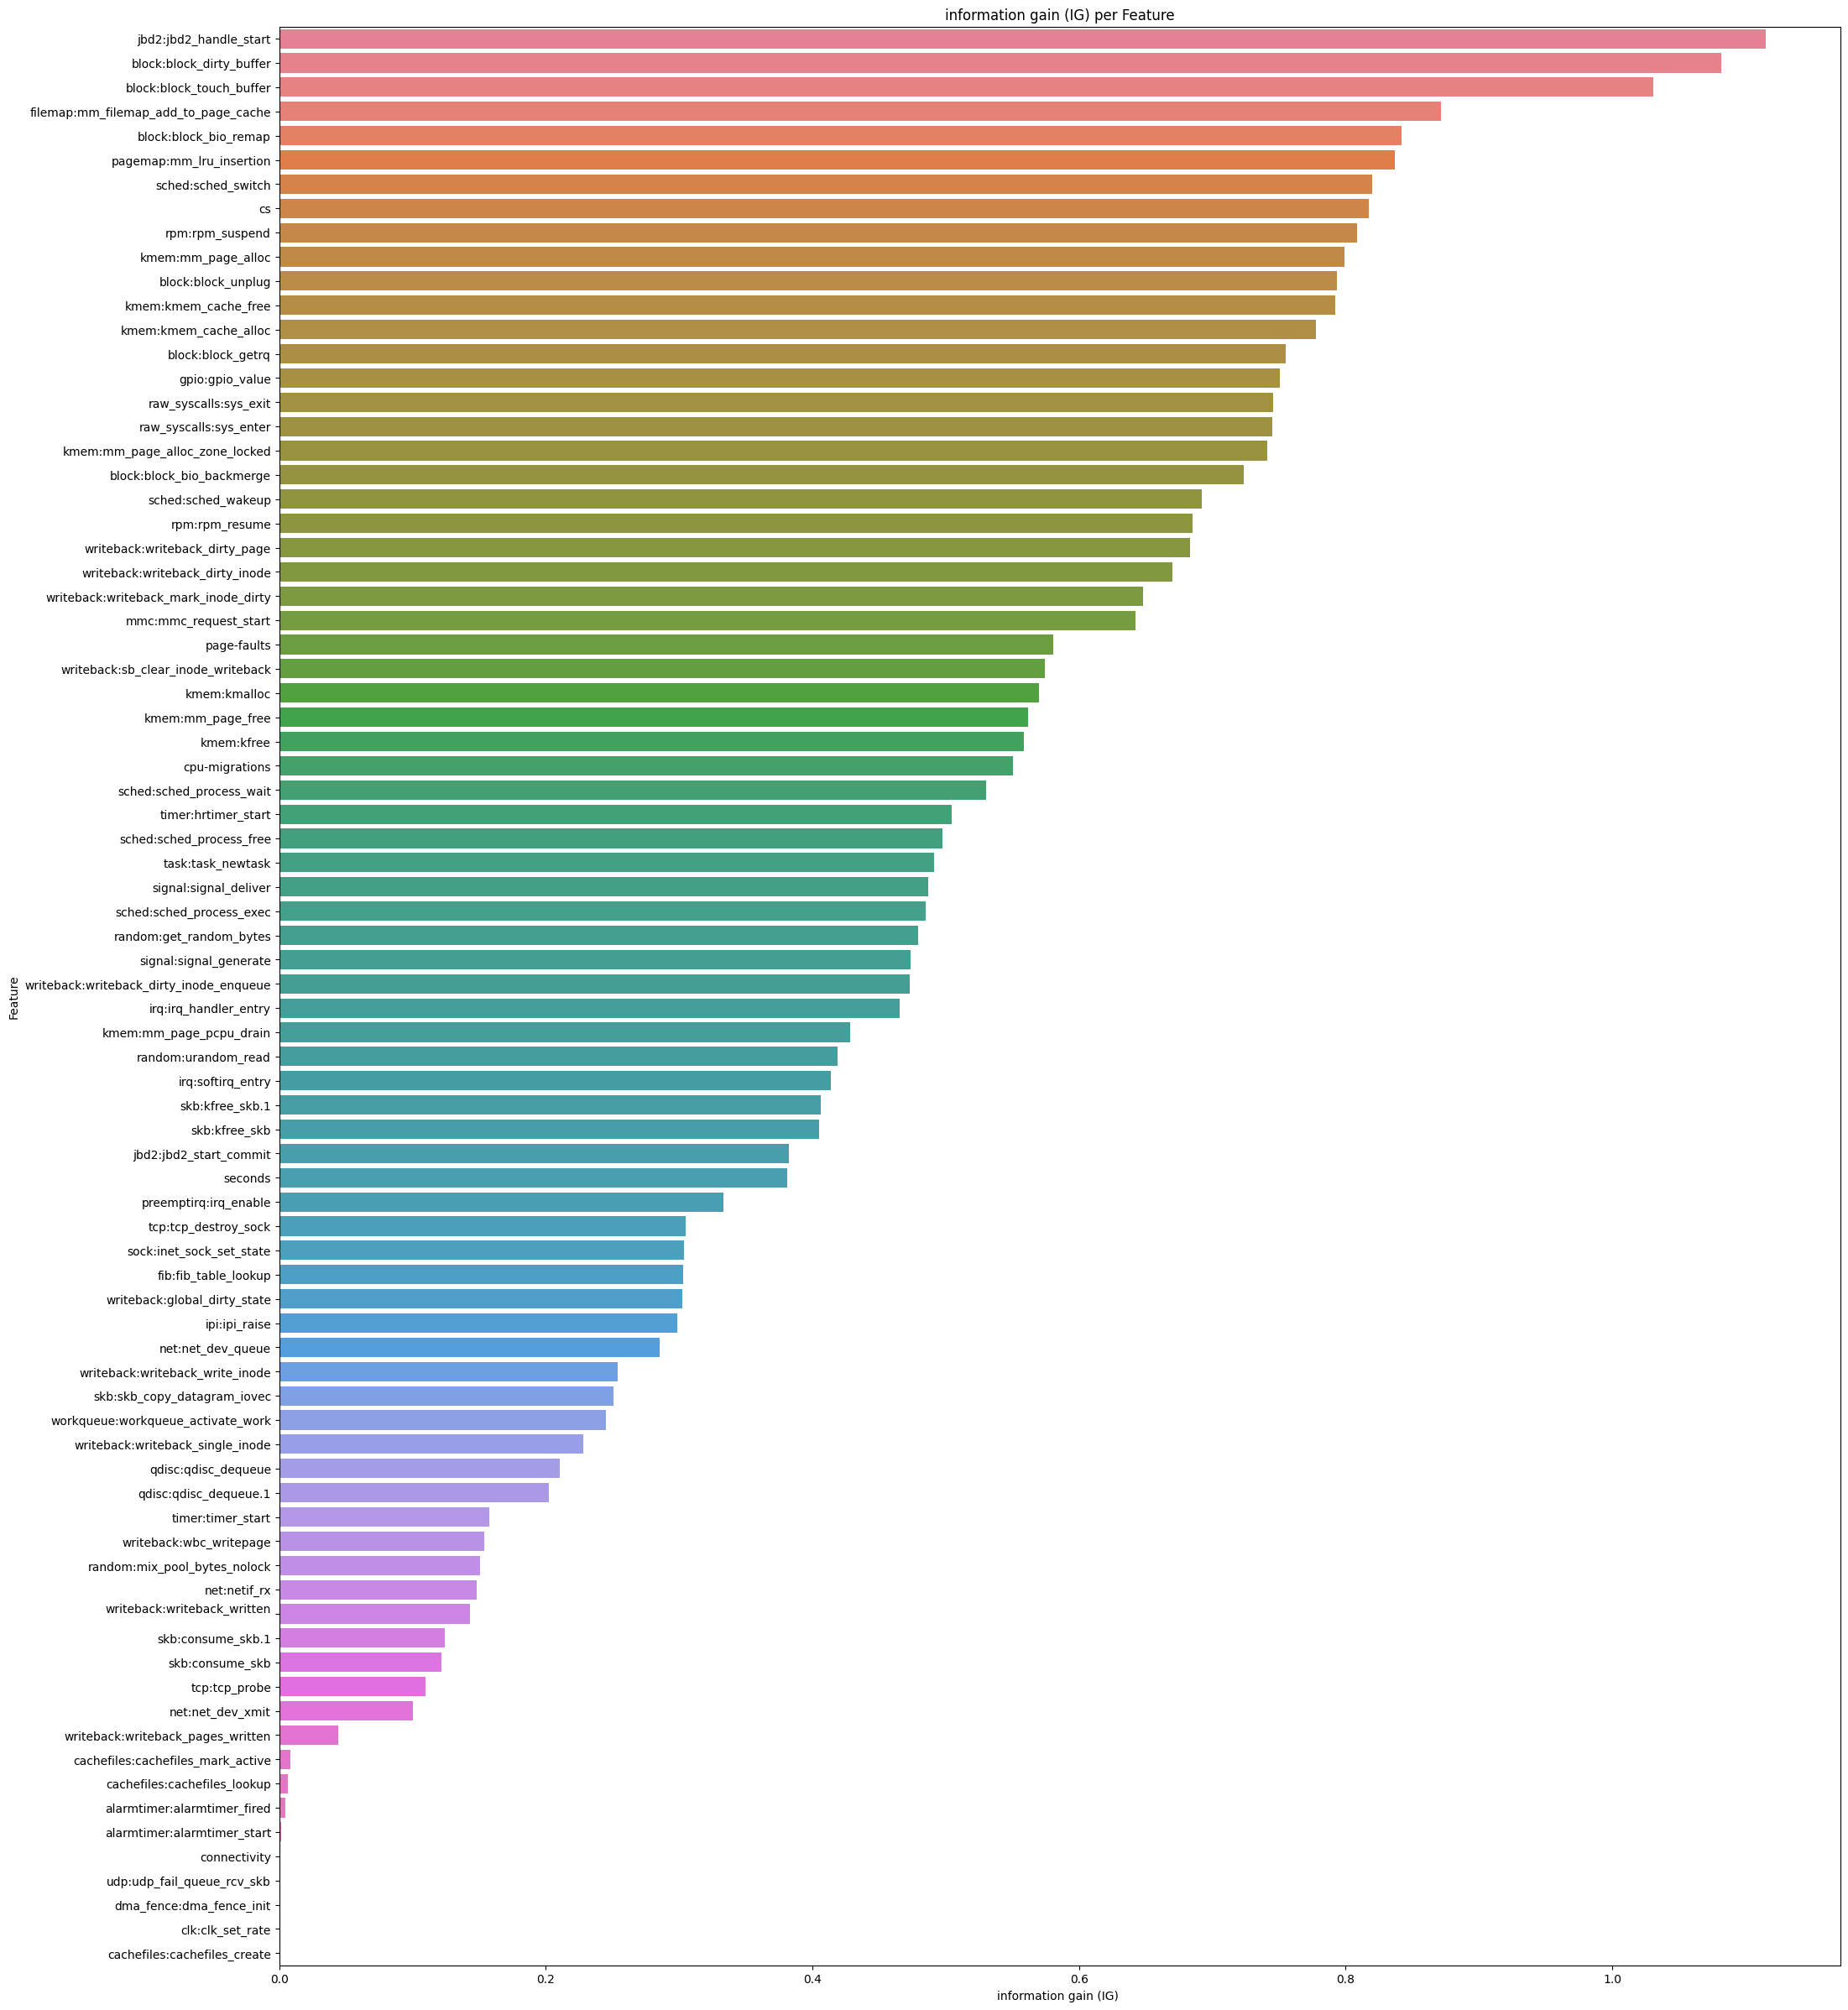

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.DataFrame(result, columns=["Feature", "IG"])
data_df = data_df.sort_values(by="IG", ascending=False)
plt.figure(figsize=(24, 30))
sns.barplot(data=data_df, native_scale=True, orient="h", hue="Feature", x="IG", y="Feature")

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('information gain (IG) ')

plt.title('information gain (IG) per Feature')
plt.show()